# 박스오피스(극장)
- 데이터 기간 : 2015 ~ 2023
- 데이터 설명 : 일별 박스오피스 데이터 + 영화 상세정보 merge

In [1]:
import pandas as pd
import numpy as np

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic") # 경로 설정

# 테스트
# plt.plot([1, 2, 3])
# plt.title("한글")
# plt.show()

In [2]:
df = pd.read_csv('../data/boxoffice_15_23_total.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33523 entries, 0 to 33522
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rnum             33523 non-null  int64  
 1   rank             33523 non-null  int64  
 2   rankInten        33523 non-null  int64  
 3   rankOldAndNew    33523 non-null  object 
 4   movieCd          33523 non-null  object 
 5   movieNm          33523 non-null  object 
 6   openDt           33523 non-null  object 
 7   salesAmt         33523 non-null  int64  
 8   salesShare       33523 non-null  float64
 9   salesInten       33523 non-null  int64  
 10  salesChange      33523 non-null  float64
 11  salesAcc         33523 non-null  int64  
 12  audiCnt          33523 non-null  int64  
 13  audiInten        33523 non-null  int64  
 14  audiChange       33523 non-null  float64
 15  audiAcc          33523 non-null  int64  
 16  scrnCnt          33523 non-null  int64  
 17  showCnt     

In [4]:
df['current_date']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
33518    2023-12-31
33519    2023-12-31
33520    2023-12-31
33521    2023-12-31
33522    2023-12-31
Name: current_date, Length: 33523, dtype: object

## 1. Preprocessing

### 시계열 변수

- 시계열변수 > datetime으로 변환

In [5]:
df['openDt'] = df['openDt'].astype(str)# float를 object로 변환

In [6]:
df['openDt'] = pd.to_datetime(df['openDt'], errors='coerce')

In [7]:
df['current_date'] = pd.to_datetime(df['current_date'])

- days_since_opening(개봉 n일) 변수 생성

In [8]:
# datetime 형식으로 변환
df['current_date'] = pd.to_datetime(df['current_date'])
df['days_since_opening'] = df['current_date'] - df['openDt'] + pd.Timedelta(days=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33523 entries, 0 to 33522
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   rnum                33523 non-null  int64          
 1   rank                33523 non-null  int64          
 2   rankInten           33523 non-null  int64          
 3   rankOldAndNew       33523 non-null  object         
 4   movieCd             33523 non-null  object         
 5   movieNm             33523 non-null  object         
 6   openDt              33451 non-null  datetime64[ns] 
 7   salesAmt            33523 non-null  int64          
 8   salesShare          33523 non-null  float64        
 9   salesInten          33523 non-null  int64          
 10  salesChange         33523 non-null  float64        
 11  salesAcc            33523 non-null  int64          
 12  audiCnt             33523 non-null  int64          
 13  audiInten           33523 non-n

- 첫주 주말까지 누적 관객 수

In [10]:
# 요일
df['openDt_weekday'] = df['openDt'].dt.weekday
df['current_date_weekday'] = df['current_date'].dt.weekday

In [11]:
# 'days_since_opening'이 7일 이하이고 'current_date_weekday'가 6인 행 필터링
filtered_rows = df[(df['days_since_opening'] <= pd.Timedelta(days=7)) & (df['current_date_weekday'] == 6)]

In [12]:
# 'filtered_rows'에서 'audiAcc' 열의 첫 번째 값을 가져와서 'first_until_weekday_Acc' 열에 추가
df['first_until_weekday_audiAcc'] = filtered_rows.groupby('movieCd')['audiAcc'].transform('first')
df['first_until_weekday_salesAcc'] = filtered_rows.groupby('movieCd')['salesAcc'].transform('first')

- 개봉 후 2달까지 주차별로 누적 스크린 수/누적 관객 수/누적 매출 컬럼 생성

In [13]:
for i in range(1, 9):
    # 해당 주차까지의 데이터 필터링
    filtered_df = df[df['days_since_opening'] <= pd.Timedelta(days=7) * i]
    df[f'{i}_weeks_audiAcc'] = filtered_df.groupby('movieCd')['audiAcc'].transform('first')
    df[f'{i}_weeks_salesAcc'] = filtered_df.groupby('movieCd')['salesAcc'].transform('first')

In [14]:
df.columns

Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'salesAmt', 'salesShare', 'salesInten', 'salesChange',
       'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt',
       'showCnt', 'current_date', 'showTm', 'prdtYear', 'prdtStatNm', 'typeNm',
       'nationNm', 'genreNm', 'director', 'actor', 'showTypeGroupNm',
       'showTypeNm', 'audits', 'days_since_opening', 'openDt_weekday',
       'current_date_weekday', 'first_until_weekday_audiAcc',
       'first_until_weekday_salesAcc', '1_weeks_audiAcc', '1_weeks_salesAcc',
       '2_weeks_audiAcc', '2_weeks_salesAcc', '3_weeks_audiAcc',
       '3_weeks_salesAcc', '4_weeks_audiAcc', '4_weeks_salesAcc',
       '5_weeks_audiAcc', '5_weeks_salesAcc', '6_weeks_audiAcc',
       '6_weeks_salesAcc', '7_weeks_audiAcc', '7_weeks_salesAcc',
       '8_weeks_audiAcc', '8_weeks_salesAcc'],
      dtype='object')

### 데이터 재구성

In [15]:
agg_df = df.groupby('movieNm').agg({
    'movieCd': 'first',  # 영화 구분 코드
    'openDt': 'first',  # 개봉일
    'salesAcc': 'max',  # 누적 매출
    'audiAcc': 'max',  # 누적 매출
    'scrnCnt': 'sum',  # 스크린 수 합산
    'showTm': 'first',  # 상영시간
    'typeNm': 'first',  # 타입
    'nationNm': 'first',  # 국가
    'genreNm': 'first',  # 장르
    'director': 'first',  # 감독
    'actor': 'first',  # 배우
    'showTypeGroupNm': 'first',  # 상영 타입 _그룹
    'showTypeNm': 'first',  # 상영 타입
    'audits': 'first',  # 관람가
    'first_until_weekday_audiAcc': 'first',
    'first_until_weekday_salesAcc': 'first',
    '1_weeks_audiAcc': 'first',
    '1_weeks_salesAcc': 'first',
    '2_weeks_audiAcc': 'first',
    '2_weeks_salesAcc': 'first',
    '3_weeks_audiAcc': 'first',
    '3_weeks_salesAcc': 'first',
    '4_weeks_audiAcc': 'first',
    '4_weeks_salesAcc': 'first',
    '5_weeks_audiAcc': 'first',
    '5_weeks_salesAcc': 'first',
    '6_weeks_audiAcc': 'first',
    '6_weeks_salesAcc': 'first',
    '7_weeks_audiAcc': 'first',
    '7_weeks_salesAcc': 'first',
    '8_weeks_audiAcc': 'first',
    '8_weeks_salesAcc': 'first'
}).reset_index()


In [16]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   movieNm                       2372 non-null   object        
 1   movieCd                       2372 non-null   object        
 2   openDt                        2350 non-null   datetime64[ns]
 3   salesAcc                      2372 non-null   int64         
 4   audiAcc                       2372 non-null   int64         
 5   scrnCnt                       2372 non-null   int64         
 6   showTm                        1085 non-null   float64       
 7   typeNm                        1094 non-null   object        
 8   nationNm                      1094 non-null   object        
 9   genreNm                       1093 non-null   object        
 10  director                      983 non-null    object        
 11  actor                         

In [17]:
agg_df.head()

,movieNm,movieCd,openDt,salesAcc,audiAcc,scrnCnt,showTm,typeNm,nationNm,genreNm,...,4_weeks_audiAcc,4_weeks_salesAcc,5_weeks_audiAcc,5_weeks_salesAcc,6_weeks_audiAcc,6_weeks_salesAcc,7_weeks_audiAcc,7_weeks_salesAcc,8_weeks_audiAcc,8_weeks_salesAcc
0,#살아있다,20193069,2020-06-24,15965329900,1903703,34890,97.0,장편,한국,드라마,...,1977.0,9.217000e+06,1977.0,9.217000e+06,1977.0,9.217000e+06,1977.0,9.217000e+06,1977.0,9.217000e+06
1,#아이엠히어,20197277,2021-01-14,119570530,14393,2350,97.0,장편,프랑스,멜로/로맨스,...,2443.0,1.921993e+07,2443.0,1.921993e+07,2443.0,1.921993e+07,2443.0,1.921993e+07,2443.0,1.921993e+07
2,0.0MHz,20188144,2019-05-29,1058297060,133522,3074,NaN,None,None,None,...,33454.0,2.144963e+08,33454.0,2.144963e+08,33454.0,2.144963e+08,33454.0,2.144963e+08,33454.0,2.144963e+08
3,007 노 타임 투 다이,20191061,2021-09-29,11948538370,1222296,36288,163.0,장편,미국,액션,...,104194.0,7.870042e+08,104194.0,7.870042e+08,104194.0,7.870042e+08,104194.0,7.870042e+08,104194.0,7.870042e+08
4,007 스펙터,20157432,2015-11-11,14119375630,1797440,13404,NaN,None,None,None,...,188319.0,1.454388e+09,188319.0,1.454388e+09,188319.0,1.454388e+09,188319.0,1.454388e+09,188319.0,1.454388e+09


## 2. 데이터 전처리

### 분포 확인

#### 수치형 변수 분포 확인(누적 매출, 누적 관객 수, 누적 스크린 수) > 이상치

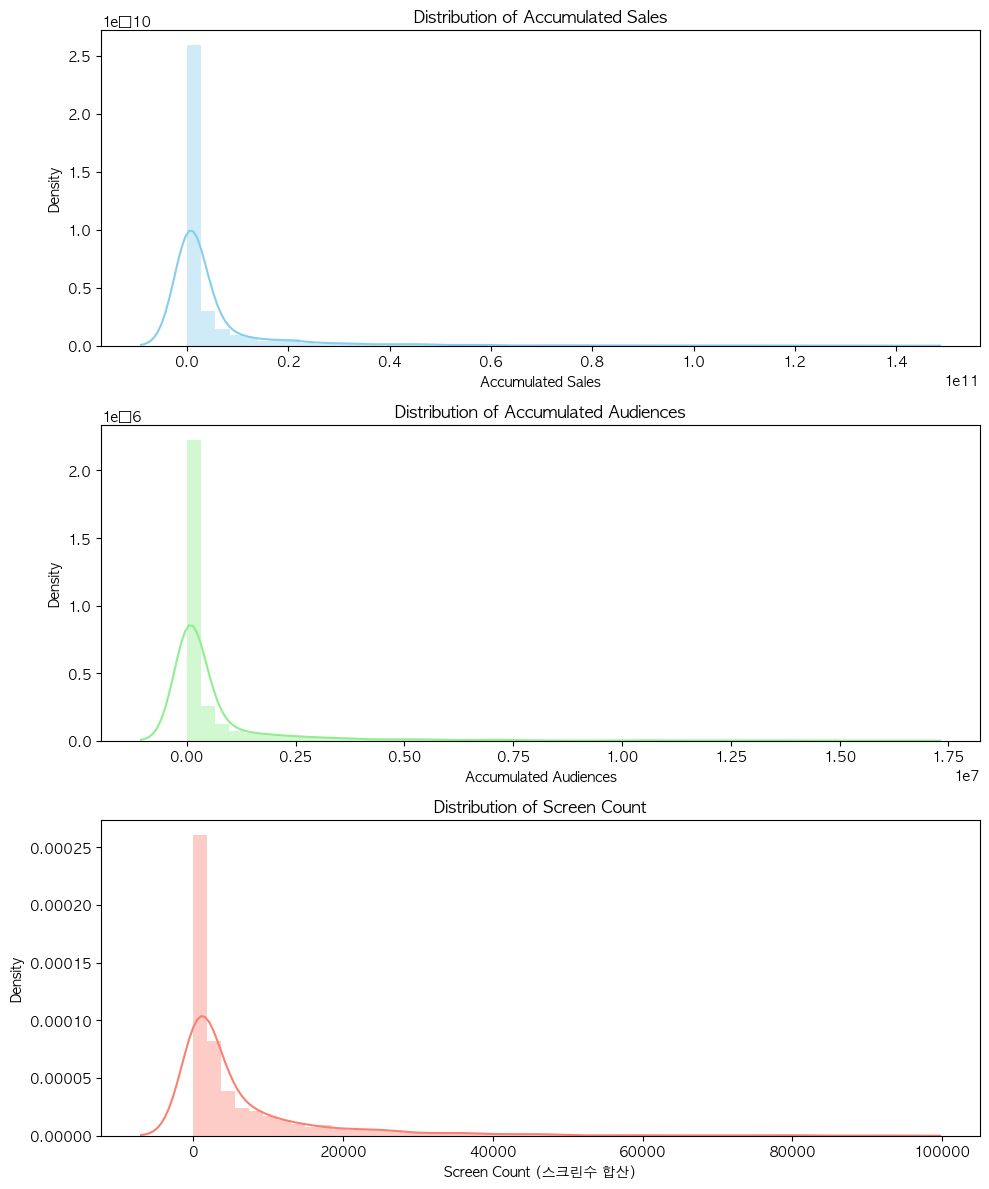

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 누적 매출
sns.distplot(agg_df['salesAcc'], ax=axes[0], color='skyblue')
axes[0].set_xlabel('Accumulated Sales')
axes[0].set_title('Distribution of Accumulated Sales')

# 관객 수 누적
sns.distplot(agg_df['audiAcc'], ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Accumulated Audiences')
axes[1].set_title('Distribution of Accumulated Audiences')

# 스크린 수 누적
sns.distplot(agg_df['scrnCnt'], ax=axes[2], color='salmon')
axes[2].set_xlabel('Screen Count (스크린수 합산)')
axes[2].set_title('Distribution of Screen Count')

# 그래프 간 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()


#### 상영 시간 분포

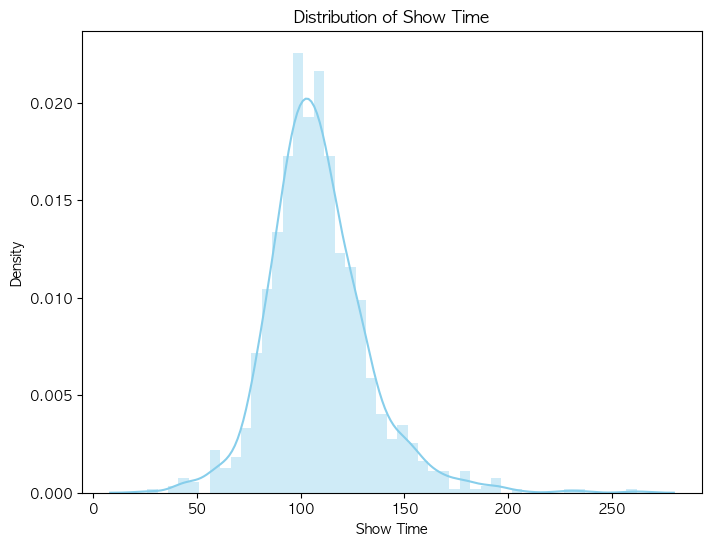

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(agg_df['showTm'], color='skyblue', ax=ax)
ax.set_xlabel('Show Time')
ax.set_ylabel('Density')
ax.set_title('Distribution of Show Time')
plt.show()

#### 범주형 변수 분포 (타입, 국가, 장르, 상영타입)   

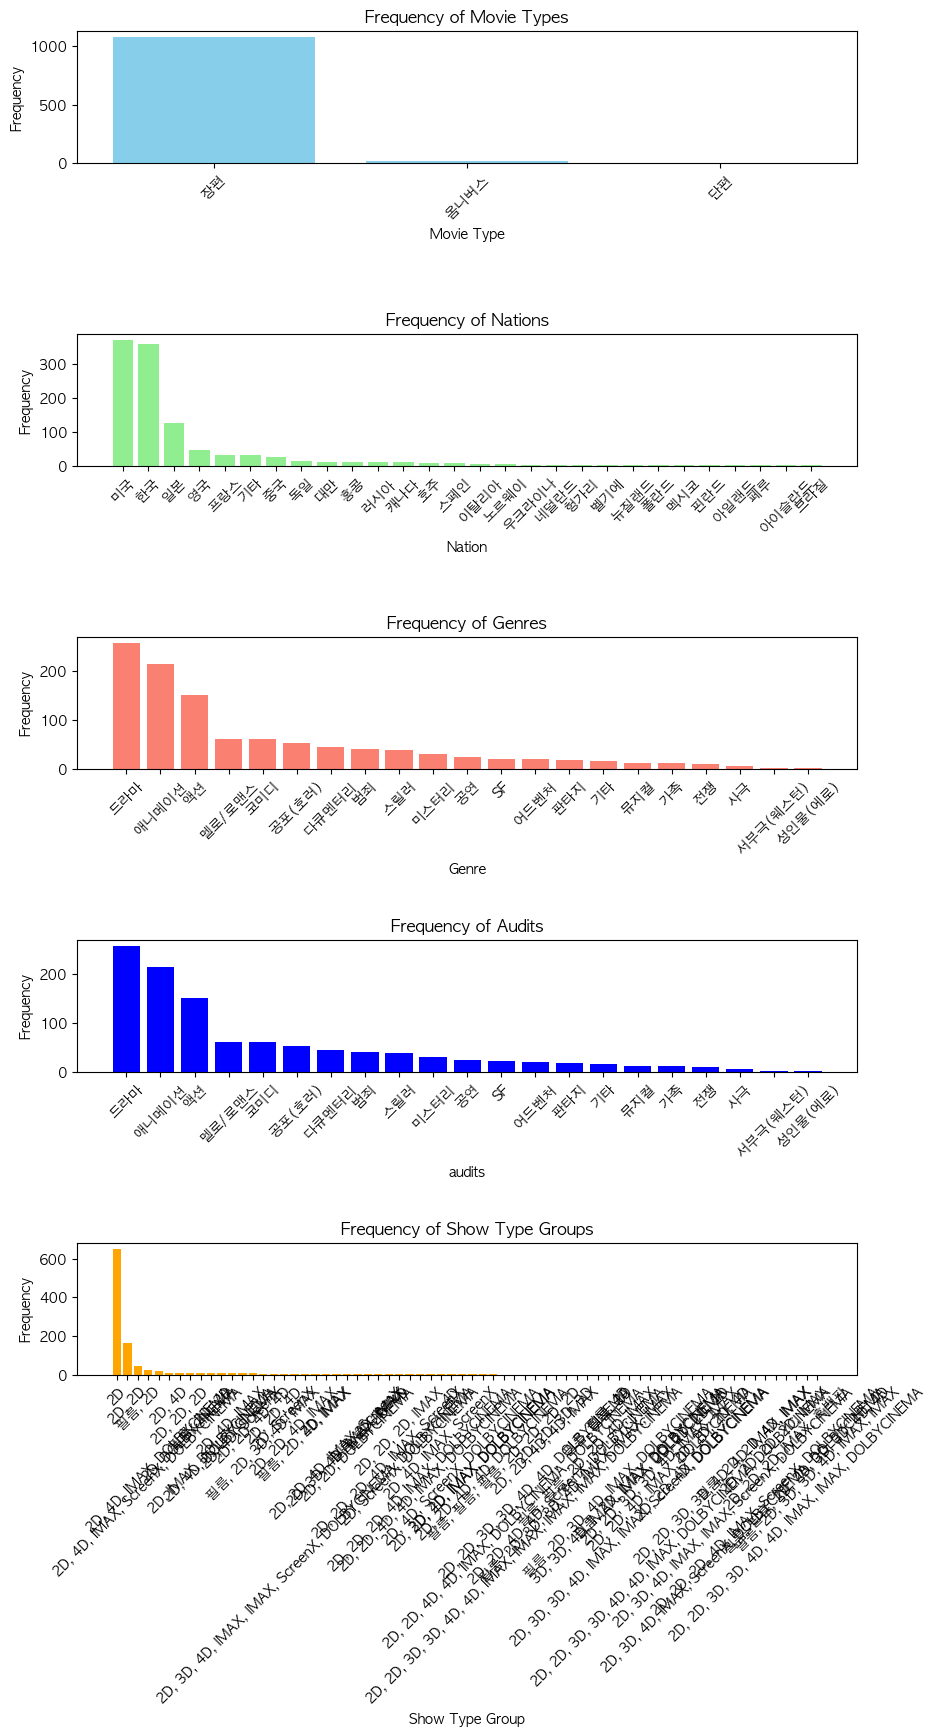

In [20]:
import matplotlib.pyplot as plt

# Figure와 Axes 생성
fig, axes = plt.subplots(5, 1, figsize=(10, 18))

# 'typeNm' 열의 카운트 플롯
type_counts = agg_df['typeNm'].value_counts()
axes[0].bar(type_counts.index, type_counts.values, color='skyblue')
axes[0].set_xlabel('Movie Type')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Movie Types')
axes[0].tick_params(axis='x', rotation=45)

# 'nationNm' 열의 카운트 플롯
nation_counts = agg_df['nationNm'].value_counts()
axes[1].bar(nation_counts.index, nation_counts.values, color='lightgreen')
axes[1].set_xlabel('Nation')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Nations')
axes[1].tick_params(axis='x', rotation=45)

# 'genreNm' 열의 카운트 플롯
genre_counts = agg_df['genreNm'].value_counts()
axes[2].bar(genre_counts.index, genre_counts.values, color='salmon')
axes[2].set_xlabel('Genre')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Frequency of Genres')
axes[2].tick_params(axis='x', rotation=45)

audits_counts = agg_df['audits'].value_counts()
axes[3].bar(genre_counts.index, genre_counts.values, color='blue')
axes[3].set_xlabel('audits')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Frequency of Audits')
axes[3].tick_params(axis='x', rotation=45)

# 'showTypeGroupNm' 열의 카운트 플롯
showTypeGroup_counts = agg_df['showTypeGroupNm'].value_counts()
axes[4].bar(showTypeGroup_counts.index, showTypeGroup_counts.values, color='orange')
axes[4].set_xlabel('Show Type Group')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Frequency of Show Type Groups')
axes[4].tick_params(axis='x', rotation=45)

# 그래프 간 간격 조절
plt.tight_layout(pad=3.0)

# 그래프 출력
plt.show()


showtypegroup 전처리/인코딩 필요 > 지원하는 상영 타입 / IMAX 상영여부 / 돌비시네마 상영 여부 / 스크린 엑스 상영여부 등으로 원핫인코딩

#### 상영 타입 > 원핫 인코딩(1,0)

In [23]:
# None 값이 아닌 것만 필터링하고 쉼표로 분할하여 유니크한 값 추출
unique_show_types = set(item.strip() for sublist in agg_df['showTypeGroupNm'] if sublist is not None for item in sublist.split(','))

In [25]:
# 상영 타입에 따라 컬럼 생성 > 존재하면 1, 존재하지 않으면 0부여
for show_type in unique_show_types:
    agg_df[show_type] = agg_df['showTypeGroupNm'].apply(lambda x: 1 if isinstance(x, str) and show_type in x.split(', ') else 0)

In [26]:
agg_df['4D'].head() # 테스트

0    1
1    0
2    0
3    1
4    0
Name: 4D, dtype: int64

### 데이터 추출
- 방법1)상업영화 추출
- 방법2)누적 관객 수 기준 추출

#### 누적 관객 수 20,000 이상 영화 > 607편

In [27]:
agg_df[agg_df['audiAcc'] >= 20000]['movieNm'].value_counts()

#살아있다              1
어쌔신: 더 비기닝         1
언브로큰               1
언더월드: 블러드 워        1
언더워터               1
                  ..
마음이 외치고 싶어해        1
마약왕                1
마야2                1
마야 3: 숲속 왕국의 위기    1
힘을 내요, 미스터 리       1
Name: movieNm, Length: 1631, dtype: int64

In [28]:
agg_df[agg_df['audiAcc'] <= 1000]['movieNm'].value_counts()

2020 청주영상위원회 '영화와 함께하는 11월' 관객과의 대화[GV]    1
송 오브 러브                                    1
특명: 스피드 레스큐                                1
킹 오브 프리즘 올 스타즈 -프리즘 쇼☆베스트10-               1
카오산 탱고                                     1
질투의 역사                                     1
지니어스 독                                     1
이 안에 외계인이 있다                               1
윤시내가 사라졌다                                  1
위 섬온 더 다크니스                                1
어제 일은 모두 괜찮아                               1
아이카                                        1
아이 스틸 빌리브                                  1
썰                                          1
실크 로드                                      1
스웨그                                        1
서산개척단                                      1
BIAF2021 부천국제애니메이션페스티벌 기획상영展               1
쁘떼뜨                                        1
블러드 킬                                      1
불량한 가족                                     1
박강아름 결혼하다                                  1
뮤턴트 이스케이프 

### 결측치 확인

In [29]:
agg_df.isna().sum()

movieNm                            0
movieCd                            0
openDt                            22
salesAcc                           0
audiAcc                            0
scrnCnt                            0
showTm                          1287
typeNm                          1278
nationNm                        1278
genreNm                         1279
director                        1389
actor                           1405
showTypeGroupNm                 1278
showTypeNm                      1278
audits                          1291
first_until_weekday_audiAcc      697
first_until_weekday_salesAcc     697
1_weeks_audiAcc                  190
1_weeks_salesAcc                 190
2_weeks_audiAcc                  162
2_weeks_salesAcc                 162
3_weeks_audiAcc                  155
3_weeks_salesAcc                 155
4_weeks_audiAcc                  150
4_weeks_salesAcc                 150
5_weeks_audiAcc                  142
5_weeks_salesAcc                 142
6

In [30]:
agg_df[agg_df['openDt'].isnull()]['movieNm'].value_counts()

2001 스페이스 오디세이                                                    1
2020 청주영상위원회 '영화와 함께하는 11월' 관객과의 대화[GV]                           1
젝스키스 20주년 기념 하와이 영상 NEW KIES ON THE [HONOLULU]                    1
인디애니페스트2020 릴레이작가 초청전                                             1
인디애니페스트 2018 새벽비행 2                                               1
에이핑크 스페셜 무비 : 혼                                                   1
사랑은 비를 타고                                                         1
FIWOM 2018 웃어봐+수잔과 남자+내일, 또 내일, 그리고 또 내일+여자1 여자2 여자3+루비 파샤의 전설    1
EBS 댄스파티!                                                         1
BiFan2015 판타스틱 단편 걸작선 3                                           1
BIFAN2022 엑스라지 4                                                  1
BIFAN2022 엑스라지 3                                                  1
BIFAN2022 부천 초이스: 단편 2                                            1
BIFAN2022 부천 초이스: 단편 1                                            1
BIFAN2021 판타스틱 단편 걸작선 1                         

In [31]:
agg_df[agg_df['actor'].isnull()]['movieNm'].value_counts()

0.0MHz          1
얼라이드            1
에브리데이           1
에베레스트           1
에벌리             1
               ..
마일22            1
마이펫의 이중생활 2     1
마이펫의 이중생활       1
마이펫 오지          1
힘을 내요, 미스터 리    1
Name: movieNm, Length: 1405, dtype: int64

In [32]:
agg_df[(agg_df['typeNm'] == '옴니버스') | (agg_df['typeNm'] == '단편')]

,movieNm,movieCd,openDt,salesAcc,audiAcc,scrnCnt,showTm,typeNm,nationNm,genreNm,...,8_weeks_audiAcc,8_weeks_salesAcc,IMAX,DOLBYCINEMA,ScreenX,필름,2D,흑백판,3D,4D
17,2020 청주영상위원회 '영화와 함께하는 11월' 관객과의 대화[GV],20202811,NaT,3400000,680,1,48.0,옴니버스,한국,드라마,...,NaN,NaN,0,0,0,0,1,0,0,0
43,BIAF2020 BIAF 클래식,20209385,NaT,45000000,7500,10,NaN,옴니버스,기타,애니메이션,...,NaN,NaN,0,0,0,0,1,0,0,0
44,BIAF2021 부천국제애니메이션페스티벌 기획상영展,20211927,NaT,3342000,557,3,NaN,옴니버스,기타,애니메이션,...,NaN,NaN,0,0,0,0,1,0,0,0
45,BIAF2021 한국 단편 경쟁 B,20210853,NaT,24475000,4895,9,82.0,옴니버스,한국,애니메이션,...,NaN,NaN,0,0,0,0,1,0,0,0
48,BIFAN2020 판타스틱 단편 걸작선 1,20201421,NaT,120000000,20000,37,82.0,옴니버스,기타,기타,...,NaN,NaN,0,0,0,0,1,0,0,0
49,BIFAN2021 판타스틱 단편 걸작선 1,20218827,NaT,100000000,20000,37,97.0,옴니버스,기타,기타,...,NaN,NaN,0,0,0,0,1,0,0,0
50,BIFAN2022 부천 초이스: 단편 1,20225994,NaT,42030000,8406,6,NaN,옴니버스,기타,기타,...,NaN,NaN,0,0,0,0,1,0,0,0
51,BIFAN2022 부천 초이스: 단편 2,20225979,NaT,23650000,4730,4,NaN,옴니버스,기타,기타,...,NaN,NaN,0,0,0,0,1,0,0,0
52,BIFAN2022 엑스라지 3,20225996,NaT,10265000,2053,1,NaN,옴니버스,기타,기타,...,NaN,NaN,0,0,0,0,1,0,0,0
53,BIFAN2022 엑스라지 4,20225987,NaT,11270000,2254,2,NaN,옴니버스,기타,기타,...,NaN,NaN,0,0,0,0,1,0,0,0


In [33]:
agg_df[agg_df['showTm'].isnull()]['movieNm'].value_counts()

0.0MHz          1
암전              1
엘르              1
엔젤 해즈 폴른        1
엑시트             1
               ..
맛있는 택배          1
맘마미아!2          1
말할 수 없는 비밀      1
말모이             1
힘을 내요, 미스터 리    1
Name: movieNm, Length: 1287, dtype: int64

In [34]:
agg_df['audits'].isnull().value_counts() # 13개  > 결측치 제거하는 것이 합리적 (1%)

True     1291
False    1081
Name: audits, dtype: int64

In [35]:
df = agg_df.copy()

#### 관람객 수, 상영시간, 감독, 배우 결측치 행

In [36]:
rows_with_null = df[df[['audits', 'showTm', 'director', 'actor']].isnull().any(axis=1)]
rows_with_null

,movieNm,movieCd,openDt,salesAcc,audiAcc,scrnCnt,showTm,typeNm,nationNm,genreNm,...,8_weeks_audiAcc,8_weeks_salesAcc,IMAX,DOLBYCINEMA,ScreenX,필름,2D,흑백판,3D,4D
2,0.0MHz,20188144,2019-05-29,1058297060,133522,3074,NaN,None,None,None,...,33454.0,2.144963e+08,0,0,0,0,0,0,0,0
4,007 스펙터,20157432,2015-11-11,14119375630,1797440,13404,NaN,None,None,None,...,188319.0,1.454388e+09,0,0,0,0,0,0,0,0
5,100% 울프: 푸들이 될 순 없어,20202128,2020-12-24,112849940,14153,2226,95.0,장편,호주,애니메이션,...,1205.0,9.740680e+06,0,0,0,0,1,0,0,0
6,12 솔져스,20178395,2018-01-31,1771977900,215563,2698,NaN,None,None,None,...,29132.0,1.909166e+08,0,0,0,0,0,0,0,0
7,13시간,20161630,2016-03-03,994858914,124249,2562,NaN,None,None,None,...,13068.0,9.996810e+07,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,희생부활자,20154907,2017-10-12,2356707035,300737,4723,NaN,None,None,None,...,2895.0,2.290200e+07,0,0,0,0,0,0,0,0
2366,히든 피겨스,20167363,2017-03-23,3462449933,434208,8635,NaN,None,None,None,...,9671.0,7.946260e+07,0,0,0,0,0,0,0,0
2367,히말라야,20136068,2015-12-16,60147319815,7755848,33740,NaN,None,None,None,...,3997.0,3.230200e+07,0,0,0,0,0,0,0,0
2369,히트맨: 에이전트 47,20153385,2015-09-03,485756300,62041,1865,NaN,None,None,None,...,8909.0,6.776160e+07,0,0,0,0,0,0,0,0


In [37]:
#df = df.dropna(subset = ['audits','showTm','director','actor'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   movieNm                       2372 non-null   object        
 1   movieCd                       2372 non-null   object        
 2   openDt                        2350 non-null   datetime64[ns]
 3   salesAcc                      2372 non-null   int64         
 4   audiAcc                       2372 non-null   int64         
 5   scrnCnt                       2372 non-null   int64         
 6   showTm                        1085 non-null   float64       
 7   typeNm                        1094 non-null   object        
 8   nationNm                      1094 non-null   object        
 9   genreNm                       1093 non-null   object        
 10  director                      983 non-null    object        
 11  actor                         

## 3. EDA

### 영화 산업 전반 일/주/월 별 매출액/관객수 추이

In [39]:
df = pd.read_csv('../data/boxoffice_15_23_total.csv')

In [88]:
openDt_sales = df[['current_date', 'salesAmt','audiCnt']]
sales_by_date = openDt_sales.groupby('current_date').sum()
sales_by_date.reset_index(inplace=True)
sales_by_date['current_date'] = pd.to_datetime(sales_by_date['current_date'])
sales_by_date.set_index('current_date', inplace = True)
sales_by_date

In [114]:
def plot_sales_by_week(sales_by,col, title):

    fig, ax = plt.subplots(figsize=(20, 6))

    ax.plot(sales_by.index, sales_by[col])
    ax.set_title(title)
    ax.set_xlabel('opening date')
    ax.set_ylabel('Sales')

    plt.show()

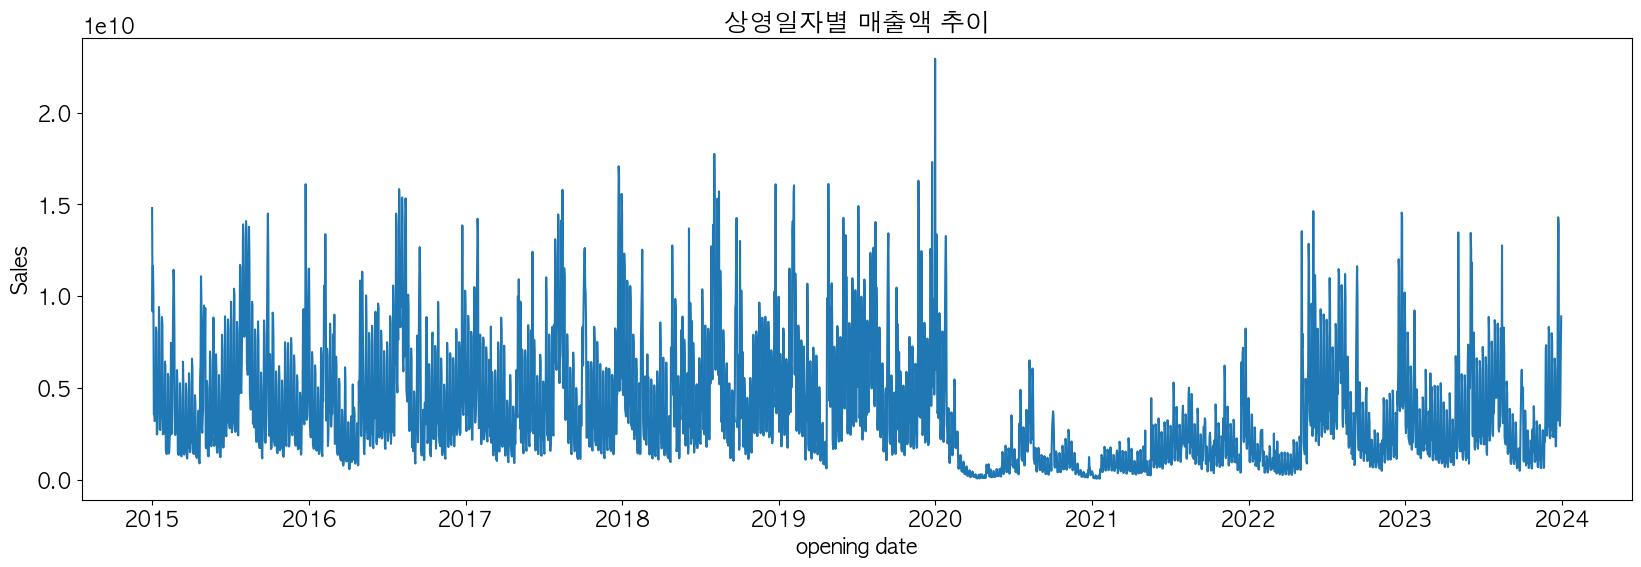

In [115]:
plot_sales_by_week(sales_by_date,'salesAmt','상영일자별 매출액 추이')

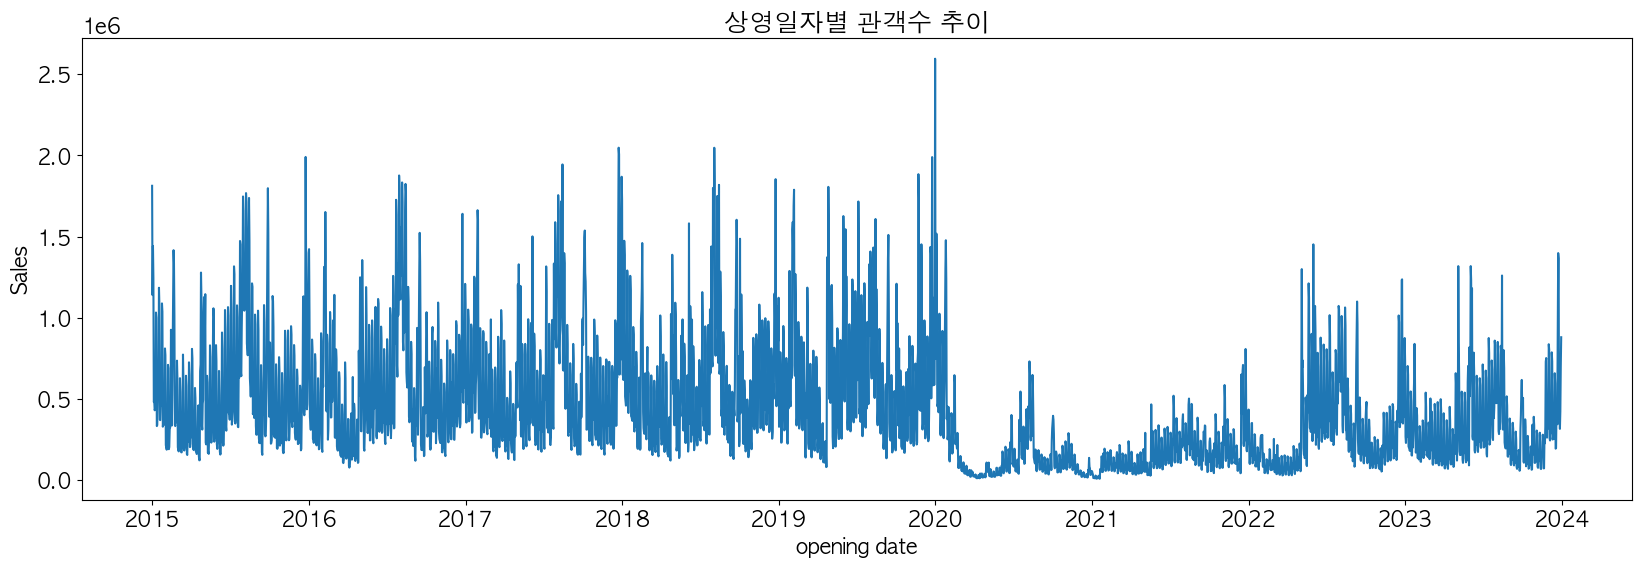

In [116]:
plot_sales_by_week(sales_by_date,'audiCnt','상영일자별 관객수 추이')

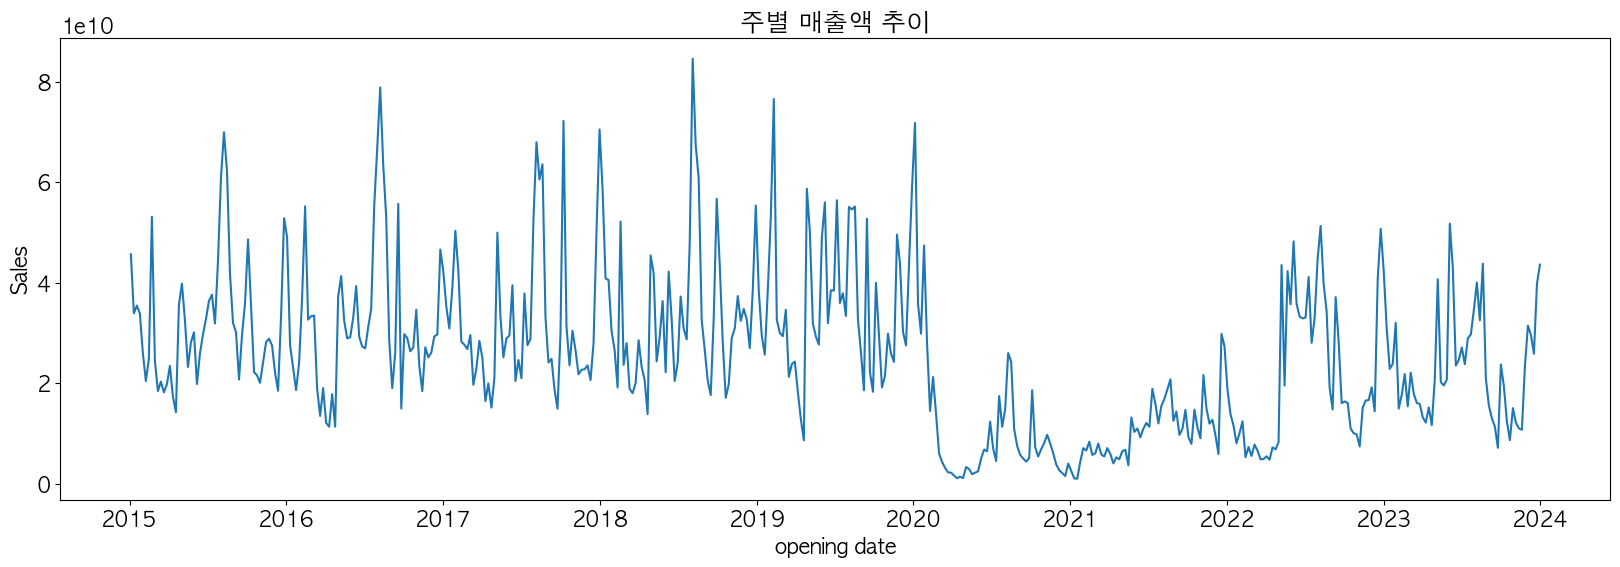

In [117]:
sales_by_week = sales_by_date.resample('W').sum()
plot_sales_by_week(sales_by_week,'salesAmt','주별 매출액 추이')

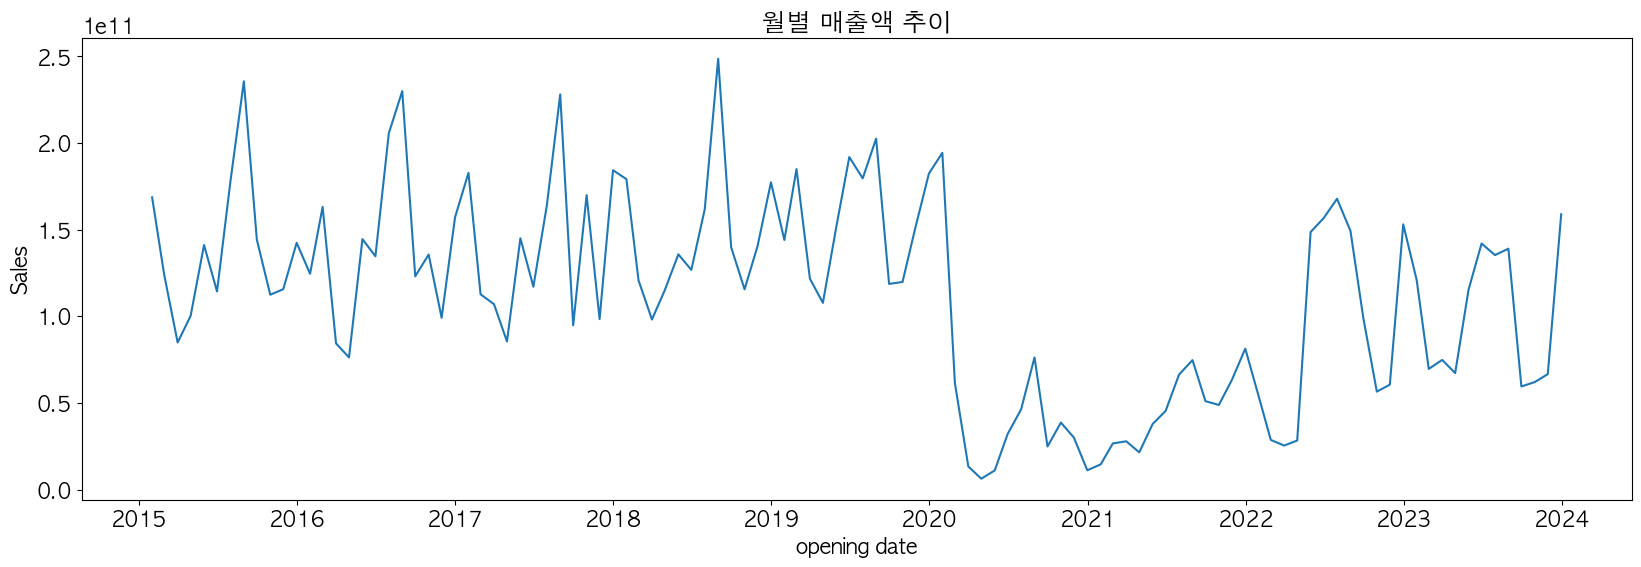

In [118]:
sales_by_month = sales_by_date.resample('M').sum()
plot_sales_by_week(sales_by_month,'salesAmt','월별 매출액 추이')

COVID19 기점으로 관객수/매출액 큰폭으로 감소

### 시계열 분해

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

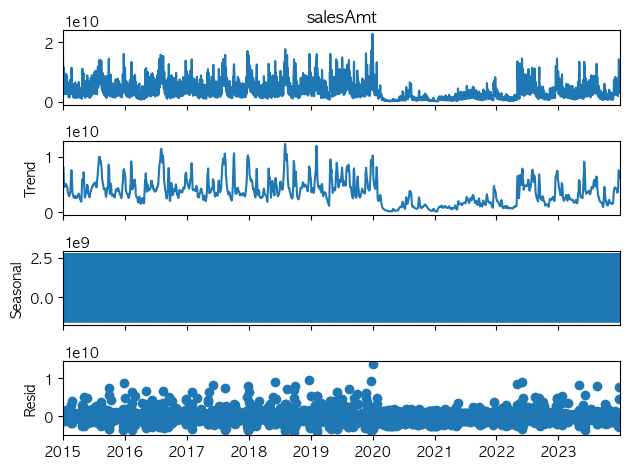

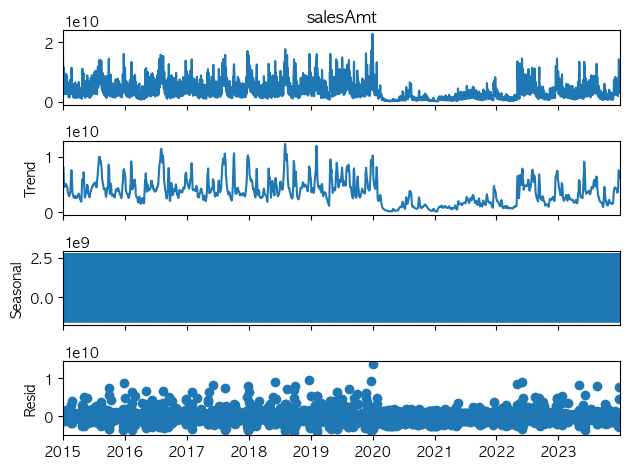

In [50]:
result = seasonal_decompose(sales_by_date['salesAmt'], model='additive')
result.plot()

In [53]:
# 추세 계산
trend_slope = (result.trend.iloc[-1] - result.trend.iloc[0]) / len(result.trend)
print("Trend slope:", trend_slope)

# 계절성 성분의 주기와 평균값 계산
seasonality_period = result.seasonal.index.freq
seasonality_mean = result.seasonal.mean()
print("Seasonality period:", seasonality_period)
print("Seasonality mean:", seasonality_mean)


Trend slope: nan
Seasonality period: None
Seasonality mean: 1099168.1653484434


#### 2020년 이전 데이터 시계열 분해

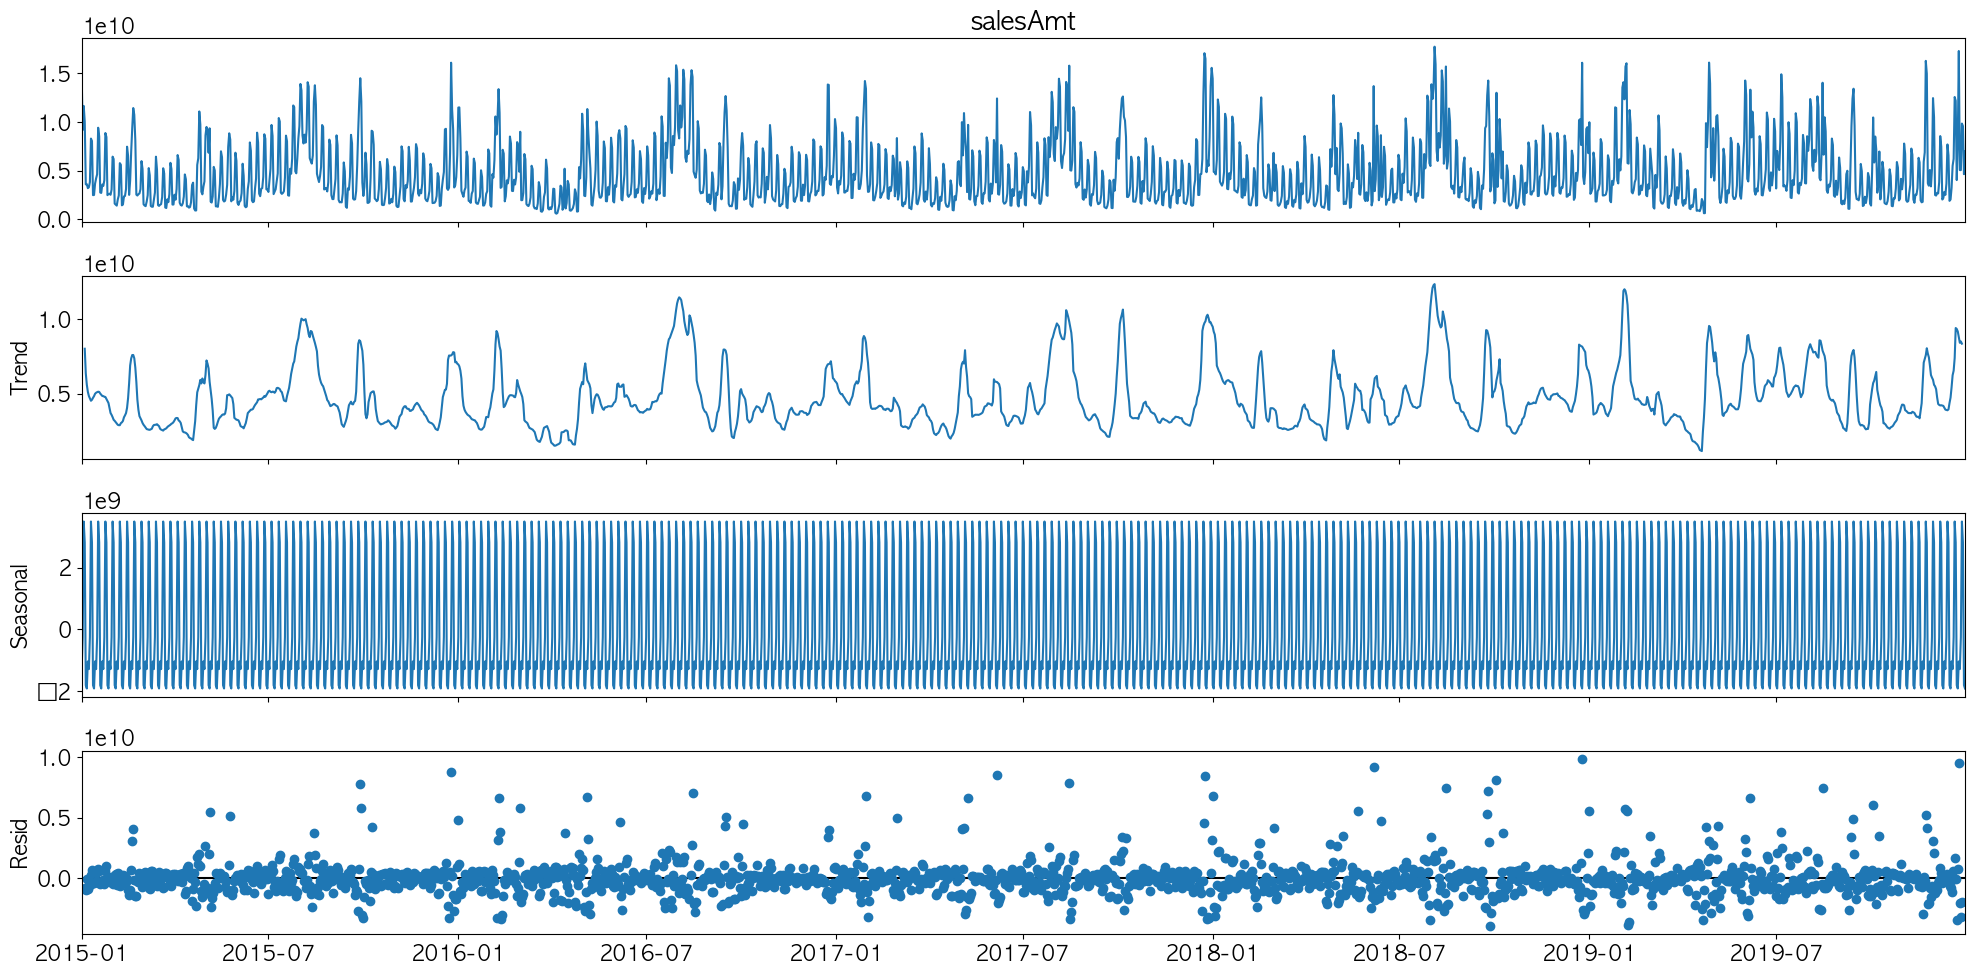

In [121]:
# 2020년 이전 데이터 선택(Covid 이전)
pre_2020_data = sales_by_date.loc[:'2019-12-31']
result = seasonal_decompose(pre_2020_data ['salesAmt'], model='additive')
result.plot()
plt.show()

#### 월별 시계열 분해

In [65]:
# 월별 리샘플링
monthly_sales = sales_by_date.resample('M').sum()

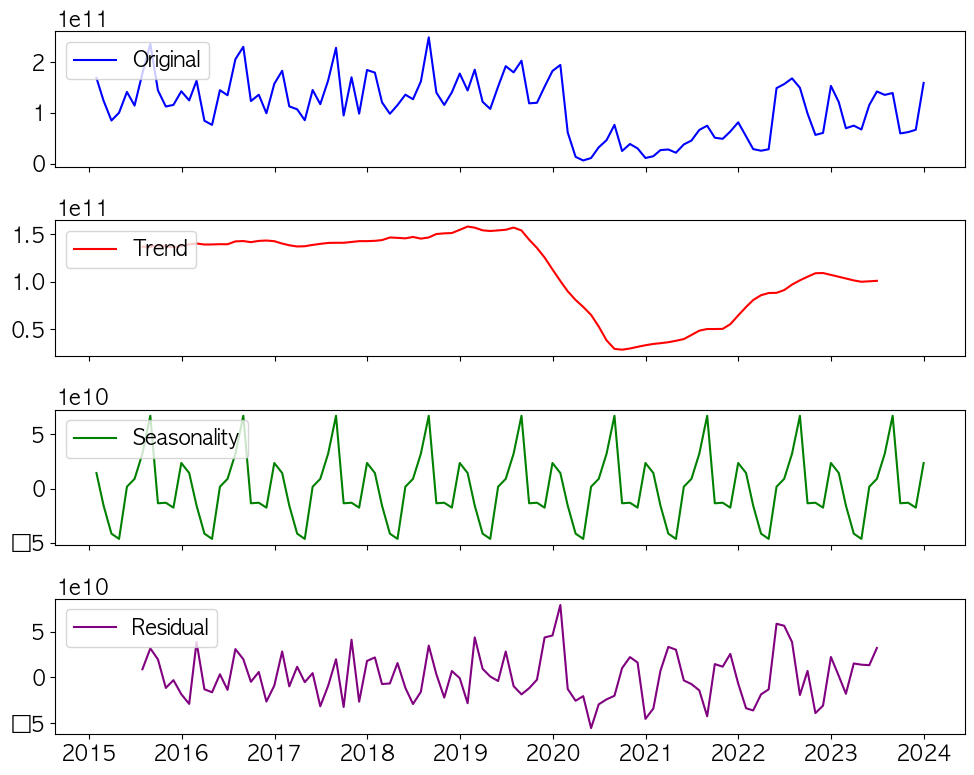

In [66]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 시계열 데이터 분해 >  trend, seasonality, residual
result = sm.tsa.seasonal_decompose(monthly_sales['salesAmt'], model='additive')

# 시각화
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# 원본 데이터
axes[0].plot(monthly_sales.index, monthly_sales['salesAmt'], label='Original', color='blue')
axes[0].legend(loc='upper left')

# 추세 (Trend)
axes[1].plot(monthly_sales.index, result.trend, label='Trend', color='red')
axes[1].legend(loc='upper left')

# 계절성 (Seasonality)
axes[2].plot(monthly_sales.index, result.seasonal, label='Seasonality', color='green')
axes[2].legend(loc='upper left')

# 잔차 (Residual)
axes[3].plot(monthly_sales.index, result.resid, label='Residual', color='purple')
axes[3].legend(loc='upper left')

plt.tight_layout()
plt.show()


In [82]:
import scipy
import signal

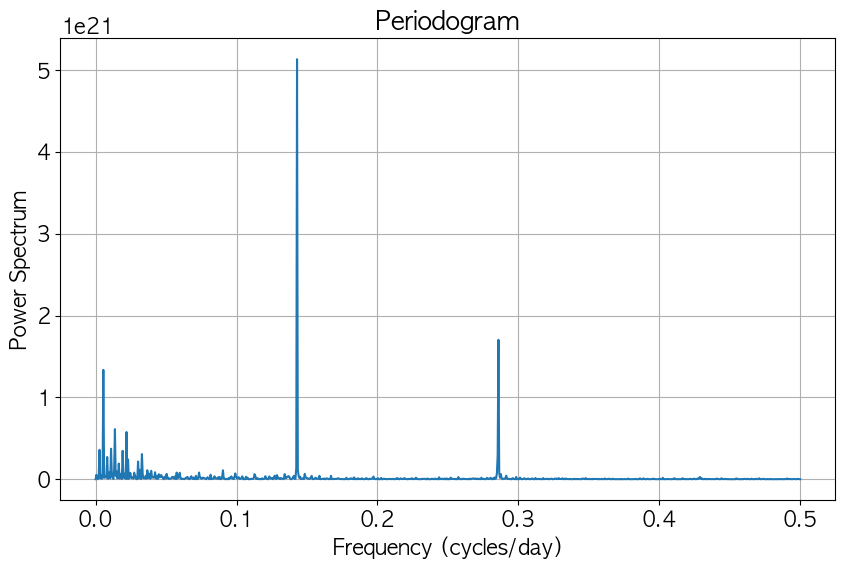

Dominant Period: 6.996168582375479


In [86]:
from scipy.signal import periodogram, find_peaks
import matplotlib.pyplot as plt
import numpy as np

# 주기그램 생성
frequencies, power_spectrum = periodogram(pre_2020_data['salesAmt'])

# 주기그램 플로팅
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectrum)
plt.title('Periodogram')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Power Spectrum')
plt.grid(True)
plt.show()

# 가장 강한 주기성 출력
peaks, _ = find_peaks(power_spectrum)
strongest_peak = np.argmax(power_spectrum[peaks])
dominant_frequency = frequencies[peaks[strongest_peak]]
dominant_period = 1 / dominant_frequency
print("Dominant Period:", dominant_period)


코로나 이전, 가장 강한 주기성 6.9일로 관찰됨 > 주말과 평일 간의 매출/관객 수 패턴의 차이가 존재할 수 있음

### IQR 이상치 탐지

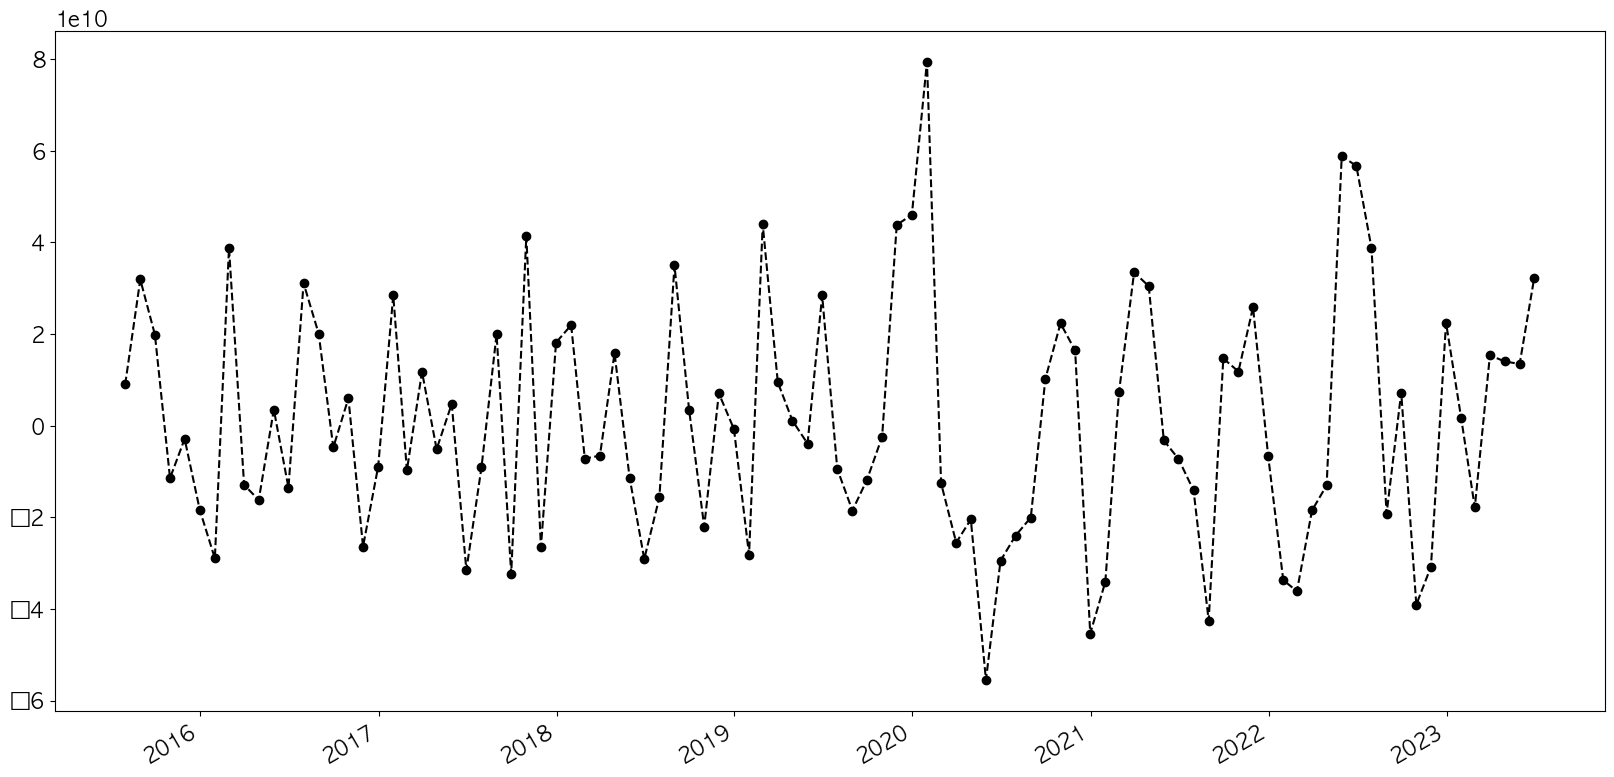

In [120]:
import matplotlib.dates as mdates
import numpy as np

plt.rc('figure',figsize=(20,10))
plt.rc('font',size=15)
fig, ax = plt.subplots()

x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

# 이상치를 정의하기 위한 값 계산
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1
IQR = IQR if IQR > 0 else -1 * IQR
lower = Q1 - 1.5 * IQR
higher = Q3 + 1.5 * IQR

# 이상치를 나타내는 수평선 추가
ax.axhline(y=lower, color='blue')
ax.axhline(y=higher, color='blue')

for i in range(len(y)):
    if y[i] < lower or y[i] > higher:
        ax.annotate('Anomaly', (mdates.date2num(x[i]), y[i]), xytext=(30, 20), textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))
fig.autofmt_xdate()
plt.show()